In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Equities', 'Foreign') + ['VT', 'ACWI'], 60, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-13 to 2019-07-12 - 77


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

76


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
EWZ,38,2.762969,2.754051,0.988829,20.802862,5.080830
ILF,38,1.743713,1.853604,0.919307,12.824572,3.960710
RSX,38,1.713803,1.250269,1.339009,15.779285,1.428578
FNDE,38,1.111996,1.388165,0.772468,10.143168,1.628895
EWA,38,0.956208,1.458053,0.628595,8.463364,2.031753
PXH,38,0.911759,1.407153,0.619745,8.012617,1.961680
DGS,38,0.900298,1.591340,0.540812,8.143886,3.353929
DEM,38,0.872391,1.406335,0.592112,7.968418,1.795207
EPP,38,0.830205,1.456821,0.542635,7.567715,1.914707


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted EWA 0.839 -0.201
evicted FNDE 0.897 0.009
evicted EWL 0.873 -0.149
evicted ACWI 0.889 -0.320
evicted HEDJ 0.882 -0.361
evicted VIGI 0.830 -0.176
evicted EWY 0.656 0.020
evicted EWW 0.613 -0.188
evicted ASHR 0.800 -0.019
evicted EWH 0.877 -0.171
evicted EPP 0.632 -0.189
evicted DGS 0.400 -0.229
evicted EPI 0.020 -0.161
retry backlogs ['PXH', 'IDEV', 'EWJ', 'VPL', 'VEU', 'ACWX', 'SCHF', 'PXF', 'SCZ', 'GSIE', 'DLS', 'EFV', 'TLTD', 'SPDW', 'VXUS', 'EFA', 'EEM', 'FNDF', 'SCHE', 'IDV', 'DEM', 'JPIN', 'VEA', 'IEUR', 'CWI', 'SCHC', 'VT', 'VGK', 'FDT', 'IEFA', 'VWO', 'VSS', 'IXUS', 'IEV', 'EZU', 'RODM', 'IPAC', 'IEMG', 'DBEF', 'EWG', 'AIA', 'VYMI', 'EWU', 'GXC', 'SPEM', 'MCHI', 'EFG', 'AAXJ', 'ILF', 'INTF', 'FNDC', 'EFAV', 'EEMV', 'HEFA', 'FEZ', 'EWC', 'EWT', 'FXI', 'INDA', 'GEM'] at 0.905/-0.51 - 1.646
evicted DBEF 0.901 -0.417
evicted EWC 0.817 -0.247
evicted FDT 0.797 -0.323
evicted EWT 0.903 -0.343
evicted GEM 0.543 -0.155
evicted INDA 0.047 -0.136
retry backlogs ['VPL', 'GXC', 'VEU

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,38.0,1.820796,1.091321,-0.332966,1.124184,1.536373,2.644790,4.199742,1.632071,15.634652,1.428886
RSX,38.0,1.713803,1.250269,-0.251254,0.809286,1.840026,2.491297,4.199471,1.339009,15.779285,1.428578
EWZ,38.0,2.762969,2.754051,-2.883621,0.740146,2.401358,5.030208,7.474701,0.988829,20.802862,5.080830
DXJ,38.0,0.410719,1.775856,-2.580381,-0.768648,0.095682,1.216515,4.117778,0.208934,3.883504,4.053224


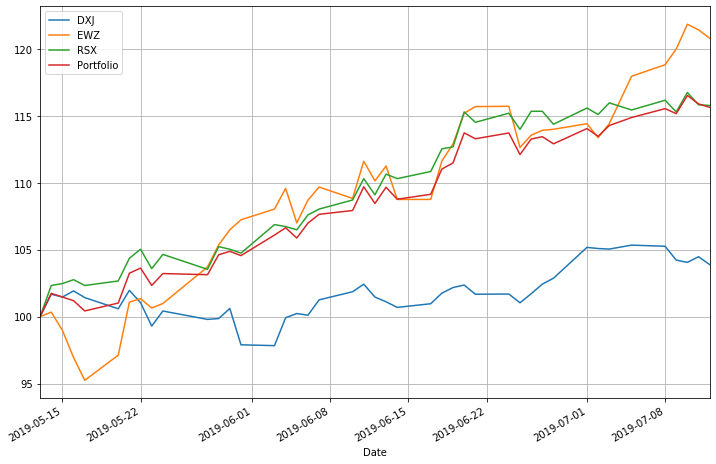

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(_lambda=2)
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=2))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)